In [ ]:
#إستدعاء المكتبيات
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!pip install patool
!pip install pyunpack
from pyunpack import Archive

In [ ]:
Archive("/data/binaryAllNaturalPlusNormalVsAttacks.7z").extractall(".")

In [ ]:
df1=pd.read_csv("/data/data1.csv")
df2=pd.read_csv("/data/data2.csv")
df3=pd.read_csv("/data/data3.csv")
df4=pd.read_csv("/data/data4.csv")
df5=pd.read_csv("/data/data5.csv")
df6=pd.read_csv("/data/data6.csv")
df7=pd.read_csv("/data/data7.csv")
df8=pd.read_csv("/data/data8.csv")
df9=pd.read_csv("/data/data9.csv")
df10=pd.read_csv("/data/data10.csv")
df11=pd.read_csv("/data/data11.csv")
df12=pd.read_csv("/data/data12.csv")
df13=pd.read_csv("/data/data13.csv")
df14=pd.read_csv("/data/data14.csv")
df15=pd.read_csv("/data/data15.csv")

In [ ]:
#دمج مجموعات البيانات
df = pd.concat([df1, df2,df3,df4, df5,df6,df7, df8,df9,df10, df11,df12,df13, df14,df15])

In [ ]:
df.shape

(78377, 129)

In [ ]:
df.ndim

2

In [ ]:
df.describe(include="all")

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,R1-PA6:IH,R1-PM6:I,R1-PA7:VH,R1-PM7:V,R1-PA8:VH,R1-PM8:V,R1-PA9:VH,R1-PM9:V,R1-PA10:IH,R1-PM10:I,R1-PA11:IH,R1-PM11:I,R1-PA12:IH,R1-PM12:I,R1:F,R1:DF,R1-PA:Z,R1-PA:ZH,R1:S,R2-PA1:VH,R2-PM1:V,R2-PA2:VH,R2-PM2:V,R2-PA3:VH,R2-PM3:V,R2-PA4:IH,R2-PM4:I,R2-PA5:IH,R2-PM5:I,R2-PA6:IH,...,R4-PA2:VH,R4-PM2:V,R4-PA3:VH,R4-PM3:V,R4-PA4:IH,R4-PM4:I,R4-PA5:IH,R4-PM5:I,R4-PA6:IH,R4-PM6:I,R4-PA7:VH,R4-PM7:V,R4-PA8:VH,R4-PM8:V,R4-PA9:VH,R4-PM9:V,R4-PA10:IH,R4-PM10:I,R4-PA11:IH,R4-PM11:I,R4-PA12:IH,R4-PM12:I,R4:F,R4:DF,R4-PA:Z,R4-PA:ZH,R4:S,control_panel_log1,control_panel_log2,control_panel_log3,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
count,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,7.837700e+04,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,...,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,7.837700e+04,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Attack
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55663
mean,-15.802424,130764.039577,2.175196,131035.528095,6.834315,131395.717581,-14.334996,393.949321,3.538540,387.438133,6.129781,381.912845,-15.798835,131056.980030,0.207857,297.083556,0.227606,87.397031,-14.504282,386.557188,-1.734936,9.979982,6.123374,9.494176,59.992801,0.000529,inf,0.018428,788.868750,-15.216491,127033.389923,4.751134,128015.428015,5.510410,128362.246185,15.836436,395.109497,-6.961603,392.508845,-6.437082,...,2.278991,131355.212680,7.065760,131745.074472,-13.931742,391.330912,3.446031,384.399819,6.096400,379.952713,-15.563852,131397.999652,0.257084,292.112647,0.207103,82.439295,-14.144585,384.036050,-1.859917,9.834635,5.989009,9.073233,59.992750,0.000602,inf,0.016616,749.014459,0.000038,0.000038,0.000026,0.000026,0.035916,0.026436,0.026500,0.035597,0.000051,0.000051,0.000089,0.000077,NaN
std,100.876750,8546.118477,111.743169,5393.135370,97.065063,5443.752388,99.601107,190.966011,109.504977,151.277183,95.294904,153.326452,100.877118,6152.379663,13.075863,2687.617199,12.488596,897.541412,99.605025,154.484403,68.383257,47.241783,73.059209,47.875569,0.610045,0.087799,NaN,0.242813,14048.448459,101.837622,16155.767175,111.043204,12106.87620

In [ ]:
# Check if missing values
df.isnull().values.any()
 
# Check number of NaNs
df.isnull().sum().sum()

0

In [ ]:
#تحويل الكلمات إلى أرقام للعمود marker
#target equal 0 is natural
#target equal 1 is Attack
df.loc[df["marker"] == "Natural", "marker"] = 0
df.loc[df["marker"] =="Attack", "marker"] = 1

In [ ]:
# إحصاء القيم
df["marker"].value_counts()

1    55663
0    22714
Name: marker, dtype: int64

In [ ]:
#سيعطي هذا مجموعة من الأماكن حيث توجد قيم NA.
 
df[df==np.inf]=np.nan
df.fillna(df.mean(), inplace=True)
#ذا كانت بياناتك تحتوي على Nan ، فجرّب ما يلي:
np.isnan(df.values.any())

False

In [ ]:
#convert type float and string
X= df.drop("marker", axis = 1)
X=X.astype("float")
 
 
from sklearn.preprocessing import Normalizer
transformer= Normalizer().fit(X) 
transformer
S=transformer.transform(X)

In [ ]:
from sklearn.preprocessing import StandardScaler
 
 
ss = StandardScaler()
 
x = pd.DataFrame(ss.fit_transform(S))
 
y = df["marker"]
 
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127
0,0.874304,0.099036,-0.474731,0.061580,-1.867958,0.023939,0.824335,1.018163,-0.569834,1.564347,-1.946451,1.417422,0.874513,0.069631,-0.016352,-0.109622,-0.018922,-0.095906,0.819024,1.415316,1.806088,0.043663,-1.503010,-0.004960,-0.013647,0.100647,-0.023363,0.205864,-0.058626,0.763126,0.129576,-0.593351,0.052249,-1.979122,0.037075,-1.394714,1.193198,1.353806,1.556328,0.066997,...,0.063134,-0.412118,-0.061167,-1.434133,-0.019137,0.620453,0.191400,-0.567535,0.131541,-1.941687,0.118280,0.869845,-0.002144,-0.022001,-0.110079,-0.016681,-0.095525,0.814642,1.448899,1.834972,0.029236,-1.538149,0.036196,-0.013647,0.100102,-0.022051,0.010575,-0.054457,-0.006187,-0.006187,-0.005045,-0.005045,-0.191576,-0.164491,-0.164691,-0.190751,-0.007073,-0.007144,-0.00943,-0.008728
1,0.889684,0.036331,-0.434350,-0.014128,-1.790412,-0.049095,0.869987,0.398801,-0.501111,0.701235,-1.836419,0.602633,0.889830,-0.003897,-0.016352,-0.109622,-0.018922,-0.095906,0.864449,0.601895,1.868931,-0.007345,-1.400215,-0.008872,-0.014110,-0.009767,-0.020642,0.008042,-0.058626,0.801732,0.166731,-0.531031,0.101154,-1.876163,0.083426,-1.318168,0.481710,1.369793,0.693499,0.109440,...,-0.000035,-0.377415,-0.134235,-1.374928,-0.094753,0.655781,0.075937,-0.498681,0.058612,-1.830469,0.048130,0.885227,-0.079381,-0.022001,-0.110079,-0.016681,-0.095525,0.860780,0.614187,1.864821,-0.011410,-1.411007,-0.005342,-0.014110,-0.010384,-0.019336,0.008870,-0.054457,-0.006187,-0.006187,-0.005045,-0.005045,-0.191576,-0.164491,-0.164691,-0.190751,-0.007073,-0.007144,-0.00943,-0.008728
2,0.890043,0.037227,-0.433884,-0.013045,-1.789712,-0.048005,0.869660,0.398513,-0.500733,0.700832,-1.835701,0.600059,0.890189,-0.002797,-0.016352,-0.109622,-0.018922,-0.095906,0.864586,0.601516,1.857189,-0.007370,-1.381310,-0.008874,-0.014112,-0.009767,-0.020636,0.019097,-0.058626,0.802080,0.166042,-0.530669,0.101267,-1.875407,0.084375,-1.317960,0.479000,1.370322,0.691744,0.109383,...,0.000865,-0.376972,-0.133153,-1.374439,-0.097088,0.655930,0.075577,-0.498514,0.058768,-1.829935,0.048285,0.885529,-0.078267,-0.022001,-0.110079,-0.016681,-0.095525,0.860917,0.614905,1.879398,-0.011434,-1.418009,0.001236,-0.014112,-0.010384,-0.019302,0.008853,-0.054457,-0.006187,-0.006187,-0.005045,-0.005045,-0.191576,-0.164491,-0.164691,-0.190751,-0.007073,-0.007144,-0.00943,-0.008728
3,0.891902,0.036003,-0.429791,-0.014517,-1.782334,-0.049518,0.871534,0.390431,-0.495338,0.682959,-1.830180,0.595921,0.892105,-0.007788,-0.016352,-0.109622,-0.018922,-0.095906,0.866303,0.590921,1.891025,-0.023903,-1.407753,-0.010136,-0.014154,-0.009767,-0.020697,0.010396,-0.058626,0.804544,0.167318,-0.525924,0.102684,-1.867290,0.085049,-1.314364,0.478504,1.372069,0.677139,0.111401,...,-0.000378,-0.373513,-0.137835,-1.368761,-0.095179,0.657141,0.074537,-0.493178,0.057356,-1.824012,0.047841,0.887439,-0.079738,-0.022001,-0.110079,-0.016681,-0.095525,0.862749,0.605183,1.892994,-0.027845,-1.432902,-0.015627,-0.014154,-0.010384,-0.019377,0.008849,-0.054457,-0.006187,-0.006187,-0.005045,-0.005045,-0.191576,-0.164491,-0.164691,-0.190751,-0.007073,-0.007144,-0.00943,-0.008728
4,0.893597,0.033239,-0.423901,-0.017844,-1.770758,-0.052923,0.868269,0.389099,-0.489603,0.661865,-1.824963,0.604001,0.893742,-0.007717,-0.016352,-0.109622,-0.018922,-0.095906,0.864216,0.586934,1.884543,-0.063127,-1.447021,-0.012640,-0.014230,-0.009767,-0.020903,0.037047,-0.058626,0.807090,0.167550,-0.519189,0.103949,-1.854435,0.085472,-1.310773,0.475735,1.371320,0.654512,0.108615,...,-0.003178,-0.368471,-0.137439,-1.359878,-0.098551,0.654775,0.074295,-0.487400,0.055487,-1.819112,0.048351,0.889183,-0.083081,-0.022001,-0.110079,-0.016681,-0.095525,0.860604,0.598972,1.887278,-0.063596,-1.489143,-0.052365,-0.014230,-0.010384,-0.019594,0

In [ ]:
 
x=np.asarray(x)

In [ ]:
#convert x to 3d
d=np.reshape(x, x.shape + (1,))

In [ ]:
d.ndim

3

In [ ]:
k = d.reshape(-1,8,16,1)

In [ ]:
# categorical target y to array 
from keras.utils.np_utils import to_categorical
 
y_cat = to_categorical(y,2)
y_cat[:10]
y_cat.astype("int")

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]])

In [ ]:
#divide datasets into to part training and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(k, y_cat,test_size=0.1,random_state=0)

In [ ]:
print(x_test.shape)
 
print(x_train.shape)

(7838, 8, 16, 1)
(70539, 8, 16, 1)


In [ ]:
import time
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
 
from keras.layers import Conv2D, MaxPooling2D # convolution layers
from keras.layers import Dense, Dropout, Flatten    # core layers

In [ ]:
 
model = Sequential()
 
model.add(Conv2D(filters = 64,padding="same", kernel_size = (5, 5), activation='tanh',
                 input_shape = (8, 16, 1)))
model.add(Conv2D(filters = 64,padding="same", kernel_size = (7, 7), activation='tanh'))
model.add(Conv2D(filters = 128,padding="same", kernel_size = (7, 7),strides=(2,2),  activation='tanh'))
model.add(MaxPooling2D(pool_size=(3,3),padding="same",strides=(2,2)  ))
model.add(Dropout(0.1))
 
model.add(Conv2D(filters = 64,padding="same", kernel_size = (5, 5), activation='tanh'))
model.add(Conv2D(filters = 64,padding="same", kernel_size = (5, 5),strides=(2,2) , activation='tanh'))
model.add(MaxPooling2D(pool_size=(3,3),padding="same",strides=(2,2)))
 
 
 
 
 
model.add(Conv2D(filters = 128,padding="same", kernel_size = (3, 3), activation='tanh'))
 
 
 
model.add(Flatten())
model.add(Dense(512, activation='tanh',kernel_initializer="he_uniform"))
model.add(Dense(2, activation='sigmoid',kernel_initializer="he_uniform"))
model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer =tf.keras.optimizers.Adam(0.001,decay=0.000005), metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 8, 16, 64)         1664      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 16, 64)         200768    
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 8, 128)         401536    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 2, 4, 128)         0         
_________________________________________________________________
dropout (Dropout)            (None, 2, 4, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 4, 64)          204864    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 1, 2, 64)          1

In [ ]:
!pip install h5py

In [ ]:
from keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau,LearningRateScheduler
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
mc = ModelCheckpoint('best_cnn2d_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
rp = ReduceLROnPlateau(monitor='val_accuracy',patience = 5,verbose=1,factor=0.5,min_lr=0.00001)
 
 
start_time = time.time()

In [ ]:
 
fit1 = model.fit(
    x_train, y_train,validation_split=0.1,batch_size=500,epochs=250, verbose=1,callbacks=[es, mc,rp])
score=model.evaluate(x_test,y_test)
print('Accuracy(on Test-data): ' + str(score[1]))
duration = time.time() - start_time
print("time of training (s)", duration)

Epoch 1/250
127/127 [==============================] - ETA: 0s - loss: 0.5927 - accuracy: 0.7097
Epoch 00001: val_accuracy improved from -inf to 0.71364, saving model to best_cnn2d_model.h5
127/127 [==============================] - 3s 26ms/step - loss: 0.5927 - accuracy: 0.7097 - val_loss: 0.5847 - val_accuracy: 0.7136
Epoch 2/250
127/127 [==============================] - ETA: 0s - loss: 0.5814 - accuracy: 0.7128
Epoch 00002: val_accuracy improved from 0.71364 to 0.71945, saving model to best_cnn2d_model.h5
127/127 [==============================] - 3s 23ms/step - loss: 0.5814 - accuracy: 0.7128 - val_loss: 0.5760 - val_accuracy: 0.7194
Epoch 3/250
127/127 [==============================] - ETA: 0s - loss: 0.5723 - accuracy: 0.7173
Epoch 00003: val_accuracy did not improve from 0.71945
127/127 [==============================] - 3s 23ms/step - loss: 0.5723 - accuracy: 0.7173 - val_loss: 0.5705 - val_accuracy: 0.7173
Epoch 4/250
127/127 [==============================] - ETA: 0s - loss

In [ ]:
def viz(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Valid'], loc='upper left')
    plt.show()
 
    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Valid'], loc='upper left')
    plt.show()

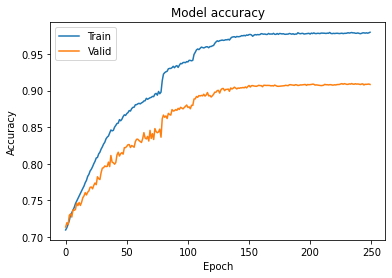

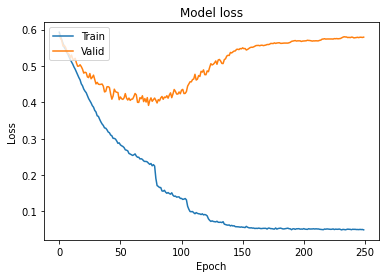

In [ ]:
viz(fit1)
#fit1.history

In [ ]:
# load a saved model
from keras.models import load_model
saved_model = load_model('best_cnn2d_model.h5')
# evaluate the model
_, train_acc = saved_model.evaluate(x_train, y_train, verbose=0)
_, test_acc = saved_model.evaluate(x_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.983, Test: 0.910


In [ ]:
import time
 
Xnew=[['70.39932429', '127673.0908', '-49.57230843', '127648.0176', '-169.5783186', '127723.2374', '65.68961121', '605.91099', '-57.00357104', '626.78553', '-173.5890232', '602.4319', '70.4222426', '127673.0908', '0', '0', '0', '0', '65.00779144', '611.5874', '118.5678861', '13.18392', '-100.8692198', '13.91636', '59.999', '0.01', '6.391383458', '0.076290455', '0', '60.65826798', '124631.8125', '-59.29595943', '124484.3594', '-179.3380777', '124715.0703', '-119.5504813', '612.7967529', '117.7267525', '632.5321045', '0.859680212', '610.1417236', '60.6802407', '124611.9844', '0', '0', '0', '0', '-120.3414991', '618.3013916', '-64.05304275', '12.7658844', '69.39789118', '12.8288269', '59.99900055', '0.02', '6.130100104', '3.135101005', '0', '60.66477135', '124187.9063', '-59.31259095', '124162.833', '-179.3014124', '124212.9796', '-119.7539088', '610.12252', '117.6855311', '628.25041', '0.658901464', '606.82654', '60.68768966', '124187.9063', '0', '0', '0', '0', '-120.4872947', '614.88338', '-64.81298579', '12.08526', '70.38786513', '11.90215', '59.999', '0.02', '6.111439531', '3.140520023', '0', '70.45089049', '127723.2374', '-49.53793097', '127096.4056', '-169.532482', '127773.3839', '65.64377459', '604.44611', '-56.87179074', '621.84156', '-173.8697725', '599.86836', '70.46234965', '127522.6512', '0', '0', '0', '0', '64.95049566', '608.47453', '119.3012721', '12.26837', '-102.060972', '11.71904', '59.999', '0.01', '6.341831592', '0.077897157', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0']]#normal    
 
Q=[['8.508423258', '130832.3229', '-111.4632095', '130782.1763', '128.5258926', '130907.5427', '3.729955246', '500.80585', '-116.6026409', '500.62274', '123.632833', '501.35518', '8.519882414', '130832.3229', '0', '0', '0', '0', '3.586715798', '500.98896', '0', '0', '0', '0', '60', '0', '7.438322484', '0.077833008', '0', '0.920105028', '128836.9766', '-119.0066616', '128699.4609', '120.9347557', '128913.4688', '176.7782594', '505.7258606', '56.64825709', '507.2078857', '-63.31146179', '506.9961548', '0.94757082', '128814.1563', '0', '0', '0', '0', '176.7068566', '506.6356812', '0', '0', '0', '0', '60', '0', '7.257351968', '-3.071651355', '0', '0.928191628', '128375.1424', '-119.0319819', '128350.0691', '120.9743089', '128400.2157', '176.7173728', '502.63695', '56.61968931', '503.36939', '-63.3290251', '503.00317', '0.95110994', '128375.1424', '0', '0', '0', '0', '176.6715361', '503.00317', '0', '0', '0', '0', '60', '0', '7.268424496', '-3.0691986', '0', '8.559989459', '130857.3961', '-111.428832', '130230.5644', '128.5831884', '130932.6159', '3.707036934', '497.50987', '-116.3619986', '498.24231', '123.741695', '496.59432', '8.571448615', '130681.8832', '0', '0', '0', '0', '3.689848201', '497.50987', '0', '0', '0', '0', '60', '0', '7.489104114', '0.086553421', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0']] #normal
 
 
N=[['70.97801166', '130957.6892', '-48.99362106', '130932.6159', '-169.0053608', '131032.909', '66.42872677', '482.31174', '-53.82938485', '483.22729', '-173.646319', '483.77662', '70.99520039', '130982.7625', '0', '0', '0', '0', '66.31986479', '483.04418', '0', '0', '0', '0', '59.999', '0', '7.742501568', '0.074426263', '0', '63.67401507', '129107.1016', '-56.26922599', '128963.9531', '-176.3168392', '129194.8594', '-120.8908103', '488.6340942', '119.1714468', '489.3894043', '-0.826721188', '489.4866943', '63.70147926', '129088.1484', '0', '0', '0', '0', '-120.8468648', '489.1662598', '0', '0', '0', '0', '60', '0', '7.521482155', '-3.061590456', '0', '63.67279977', '128650.9484', '-56.28737379', '128625.8751', '-176.2819248', '128676.0216', '-120.8826356', '485.79083', '119.1981397', '485.42461', '-0.916732472', '485.42461', '63.70144766', '128650.9484', '0', '0', '0', '0', '-120.8711765', '485.42461', '0', '0', '0', '0', '59.999', '0', '7.510130448', '-3.061004926', '0', '71.03530744', '131007.8358', '-48.97070275', '130381.004', '-168.9423355', '131083.0556', '66.42872677', '480.11442', '-53.53717638', '480.11442', '-173.5890232', '479.38198', '71.0467666', '130832.3229', '0', '0', '0', '0', '66.44018592', '479.93131', '0', '0', '0', '0', '60', '0', '7.746914069', '0.08213434', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0']] #normal
 
A=[['174.2765725', '98337.36494', '59.20372897', '128550.6553', '-72.71407378', '127347.1383', '100.4796085', '1111.29459', '-4.566473627', '241.33898', '-85.22174245', '621.84156', '173.5546457', '117618.7096', '-9.786119141', '17325.62957', '-13.22959549', '1980.78833', '118.854365', '599.68525', '82.17933656', '420.23745', '78.74731936', '154.36173', '60.016', '-0.04', '1.907633306', '1.477346313', '0', '173.1802387', '47452.82422', '50.77606342', '120554.2734', '-77.66510434', '132296.1563', '-80.08758802', '1147.247314', '170.1754746', '297.0142212', '89.53582968', '636.0683594', '167.4398882', '99778.42969', '-10.8901979', '31715.72461', '-27.77069198', '21617.71094', '-63.9047252', '642.6830444', '-97.7590974', '408.9145508', '-101.4559988', '150.7930756', '60.01599884', '-0.050000001', '0.903115513', '-1.682575032', '0', '173.1822232', '47288.18722', '50.75260149', '120226.3297', '-77.62432208', '131760.0339', '85.92075096', '1062.40422', '-112.9070631', '589.06487', '123.4151091', '150.88264', '167.4526452', '99440.58882', '-10.94922346', '31567.24693', '-27.58791784', '21588.08547', '54.61433703', '466.74739', '103.9746511', '479.01576', '110.2084319', '228.33817', '60.016', '-0.04', '0.793198105', '1.484402105', '0', '169.0225496', '41797.14109', '63.34048425', '121254.3337', '-75.34967964', '121881.1655', '122.4983766', '1748.15117', '72.4218653', '600.23458', '-38.82934978', '177.06737', '173.2395189', '93849.24961', '-3.907572163', '37534.68519', '-2.056918485', '14743.08276', '142.8441079', '707.17082', '112.8039307', '436.16802', '107.7561725', '677.507', '60.014', '-0.04', '0.341509407', '1.111764282', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0']]#'Attack'
transformer= Normalizer() 
Z=transformer.transform(A)
V = ss.transform(Z)
V=np.reshape(V, V.shape + (1,))
V = V.reshape(-1,8,16,1)
start_time = time.time()
 
# make a prediction
ynew = saved_model.predict_classes(V)
# show the inputs and predicted outputs
#for i in range(len(Xnew)):
    #print("X=%s, Predicted=%s" % (Xnew[i], ynew[i]))
 
duration = time.time() - start_time
print("time of test (s)", duration)
 
print(ynew)

time of test (s) 0.03198075294494629
[1]


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:1829: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  X = check_array(X, accept_sparse='csr')
